<a href="https://colab.research.google.com/github/kaveti27022001/Chinmai_kaveti_INFO_5731_SPRING_2025/blob/main/kaveti_Chinmai_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [22]:
import pandas as pd
from collections import defaultdict

def create_ngrams(text, n):
    words = text.split()
    ngrams_list = [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)]
    return ngrams_list

def get_ngram_frequencies(text_list, n):
    ngram_counts = defaultdict(int)
    for sentence in text_list:
        for ngram in create_ngrams(sentence, n):
            ngram_counts[ngram] += 1
    return sorted(ngram_counts.items(), key=lambda item: item[1], reverse=True)

def main():
    file_location = "/content/sample_data/cleaned_tweets_data.csv"
    dataframe = pd.read_csv(file_location)
    tweet_texts = dataframe["processed_tweets"].dropna().tolist()

    bigram_counts = get_ngram_frequencies(tweet_texts, 2)
    trigram_counts = get_ngram_frequencies(tweet_texts, 3)

    print("Top 10 Most Frequent Bigrams:")
    for phrase, count in bigram_counts[:10]:
        print(f"{phrase}: {count}")

    print("\nTop 10 Most Frequent Trigrams:")
    for phrase, count in trigram_counts[:10]:
        print(f"{phrase}: {count}")

if __name__ == "__main__":
    main()


Top 10 Most Frequent Bigrams:
openai deepseekai: 22
gpt claude: 21
claude llama: 21
llama openai: 21
deepseekai httpstconrlzxbqoh: 21
deepseek ai: 20
deepseek deepseekai: 13
planecrash deepseekai: 7
muruganmos planecrash: 6
moonpup mascot: 4

Top 10 Most Frequent Trigrams:
gpt claude llama: 21
claude llama openai: 21
llama openai deepseekai: 21
openai deepseekai httpstconrlzxbqoh: 21
muruganmos planecrash deepseekai: 6
moonpup mascot deepseekai: 4
mpup deepseek first: 3
deepseek first crypto: 3
first crypto creation: 3
crypto creation even: 3


In [28]:
import pandas as pd

def create_ngrams(text, n):
    words = text.split()
    ngrams_list = [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)]
    return ngrams_list

def read_csv_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    header = lines[0].strip().split(',')
    text_column_index = header.index("processed_tweets")
    tweet_texts = [line.strip().split(',')[text_column_index] for line in lines[1:] if len(line.strip().split(',')) > text_column_index]
    return tweet_texts

def calculate_bigram_probabilities(unigrams, bigrams):
    bigram_probs = {}
    for bigram, count in bigrams.items():
        first_word = bigram.split()[0]
        if first_word in unigrams:
            bigram_probs[bigram] = count / unigrams[first_word]
    return bigram_probs

def main():
    file_location = "/content/sample_data/cleaned_tweets_data.csv"
    tweet_texts = read_csv_file(file_location)

    unigram_counts = {}
    bigram_counts = {}
    trigram_counts = {}

    for sentence in tweet_texts:
        words = sentence.split()
        for word in words:
            unigram_counts[word] = unigram_counts.get(word, 0) + 1
        for bigram in create_ngrams(sentence, 2):
            bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1
        for trigram in create_ngrams(sentence, 3):
            trigram_counts[trigram] = trigram_counts.get(trigram, 0) + 1

    bigram_probabilities = calculate_bigram_probabilities(unigram_counts, bigram_counts)

    print("All Bigram Probabilities:")
    for bigram, prob in sorted(bigram_probabilities.items(), key=lambda item: item[1], reverse=True):
        print(f"{bigram}: {prob:.4f}")

if __name__ == "__main__":
    main()


All Bigram Probabilities:
database breached: 1.0000
breached causing: 1.0000
causing safety: 1.0000
safety concern: 1.0000
concern learn: 1.0000
learn happened: 1.0000
happened impact: 1.0000
impact content: 1.0000
content creation: 1.0000
security deepseekai: 1.0000
stay informed: 1.0000
informed let: 1.0000
let know: 1.0000
know thought: 1.0000
thought contentcreation: 1.0000
casabbe mpup: 1.0000
mpup deepseek: 1.0000
first crypto: 1.0000
crypto creation: 1.0000
forbes say: 1.0000
say moonpup: 1.0000
moonpup mascot: 1.0000
mascot deepseekai: 1.0000
showcasing its: 1.0000
unmatched precision: 1.0000
precision in: 1.0000
detecting human: 1.0000
human skeletons: 1.0000
skeletons even: 1.0000
during high-speed: 1.0000
high-speed activities.: 1.0000
video start: 1.0000
start dataenrichment: 1.0000
dataenrichment zohocrm: 1.0000
zohocrm zoho: 1.0000
zoho crm: 1.0000
crm tutorial: 1.0000
tutorial httpstcorseiwa: 1.0000
httpstcorseiwa get: 1.0000
brandlogoapi chatgpt: 1.0000
chatgpt amp: 1.0

In [9]:
import re

def generate_ngrams(text, n):
    words = text.split()
    ngrams = [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)]
    return ngrams
def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = []
    for i in range(len(words) - 1):
        if words[i][0].isupper() and words[i+1][0].isupper():
            noun_phrases.append(f"{words[i]} {words[i+1]}")
    return noun_phrases
def read_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    header = lines[0].strip().split(',')
    text_index = header.index("processed_tweets")
    texts = [line.strip().split(',')[text_index] for line in lines[1:] if len(line.strip().split(',')) > text_index]
    return texts[:100]

file_path = "/content/sample_data/cleaned_tweets_data.csv"
texts = read_csv(file_path)

noun_phrase_counts = {}
text_noun_phrases = []

for text in texts:
    noun_phrases = extract_noun_phrases(text)
    text_noun_phrases.append(noun_phrases)
    for np in noun_phrases:
        noun_phrase_counts[np] = noun_phrase_counts.get(np, 0) + 1

max_freq = max(noun_phrase_counts.values(), default=1)
noun_phrase_probabilities = {np: count / max_freq for np, count in noun_phrase_counts.items()}

print("\nNoun Phrase Probability Table:")
print("\t" + "\t".join(noun_phrase_probabilities.keys()))
for i, noun_phrases in enumerate(text_noun_phrases):
    row = [str(noun_phrase_probabilities.get(np, 0)) for np in noun_phrase_probabilities.keys()]
    print(f"Tweet {i+1}\t" + "\t".join(row))




Noun Phrase Probability Table:
	VID AI	AI Help	Help Create	Messi Ronaldo	Ronaldo Football	Football Shorts
Tweet 1	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 2	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 3	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 4	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 5	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 6	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 7	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 8	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 9	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 10	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 11	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 12	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 13	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 14	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 15	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 16	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 17	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 18	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 19	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 20	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 21	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 22	1.0	1.0	1.0	1.0	1.0	1.0
Tweet 23	1.0	1.0	1.0	1.0	1.0	1.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [25]:

import re
import math

def create_ngrams(text, n):
    words = text.split()
    ngrams = [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)]
    return ngrams

def noun_phrases(text):
    words = text.split()
    noun_phrases = []
    for i in range(len(words) - 1):
        if words[i][0].isupper() and words[i+1][0].isupper():
            noun_phrases.append(f"{words[i]} {words[i+1]}")
    return noun_phrases

def read_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    header = lines[0].strip().split(',')
    text_index = header.index("processed_tweets")
    texts = [line.strip().split(',')[text_index] for line in lines[1:] if len(line.strip().split(',')) > text_index]
    return texts[:100]

file_path = "/content/sample_data/cleaned_tweets_data.csv"
texts = read_csv(file_path)
document_term_counts = []
term_document_frequency = {}

for text in texts:
    term_counts = {}
    words = text.split()
    for word in words:
        term_counts[word] = term_counts.get(word, 0) + 1
    document_term_counts.append(term_counts)
    for term in term_counts.keys():
        term_document_frequency[term] = term_document_frequency.get(term, 0) + 1

num_documents = len(texts)
idf_values = {term: math.log(num_documents / (freq + 1)) for term, freq in term_document_frequency.items()}

tfidf_matrix = []
for term_counts in document_term_counts:
    tfidf_vector = {term: (count / max(term_counts.values())) * idf_values[term] for term, count in term_counts.items()}
    tfidf_matrix.append(tfidf_vector)
terms = sorted(term_document_frequency.keys())
print("\nTF-IDF Matrix:")
print("\t" + "\t".join(terms))
for i, tfidf_vector in enumerate(tfidf_matrix):
    row = [str(tfidf_vector.get(term, 0)) for term in terms]
    print(f"Tweet {i+1}\t" + "\t".join(row))








TF-IDF Matrix:
	#AI	#BusinessIntelligence	#DataAnalytics	#DeepSeek	#DeepSeekAI	#ML"	#PrivacyConcerns	#deepseek	#deepseekai	&amp;	.	100	AI	Ai	Create	Football	Help	Let's	Messi	Minutes	Ronaldo	Shorts	Smarter	TigerGPT	VID	We've	about	activities.	ai	airevolution	akabull	amid	amp	and…"	aquariumfish	aquariumhobby	arowanafish	artificialintelligence	artisbersuara	artistbersuara	arwana	arwanasuperred	at	begitu	bigfish	bisa	block	blocked	boom	brandlogoapi	breached	but	capcut	cartesiproject	casabbe	causing	chainvisi	chatgpt	check	china	chiparwana	client	climatechamber	concern	consideration	content	contentcreation	coolfish	core	creation	crm	crypto	currency	customer	cyberpunkfuture	danbleclimate	data	database	dataenrichment	decisions	deepseek	deepseekai	deepseekr	designs	detecting	diagnostics	discover	district	domains	during	empowering	enterprise	ethical	even	everyday	expectation	factory	faster.	first	fish	for	forbes	founder	full	gacor	gains!	get	global	got	great	happened	healthcare	here's	hero	hig

In [26]:

import math
import pandas as pd

file_path = "/content/sample_data/cleaned_tweets_data.csv"
df = pd.read_csv(file_path)

documents = df["processed_tweets"].tolist()

def compute_tf(doc):
    words = doc.split()
    tf = {}
    total_words = len(words)
    for word in words:
        tf[word] = tf.get(word, 0) + 1
    for word in tf:
        tf[word] /= total_words
    return tf

tf_documents = [compute_tf(doc) for doc in documents]

idf = {}
document_count = len(documents)
all_words = set(word for doc in tf_documents for word in doc)

for word in all_words:
    containing_docs = sum(1 for doc in tf_documents if word in doc)
    idf[word] = math.log(document_count / (1 + containing_docs))

tfidf_documents = []
for tf in tf_documents:
    tfidf = {word: tf[word] * idf[word] for word in tf}
    tfidf_documents.append(tfidf)

def cosine_similarity(query, doc_tfidf):
    query_tf = compute_tf(query)
    query_tfidf = {word: query_tf[word] * idf.get(word, 0) for word in query_tf}

    dot_product = sum(query_tfidf.get(word, 0) * doc_tfidf.get(word, 0) for word in query_tfidf)
    query_magnitude = math.sqrt(sum(val**2 for val in query_tfidf.values()))
    doc_magnitude = math.sqrt(sum(val**2 for val in doc_tfidf.values()))

    if query_magnitude == 0 or doc_magnitude == 0:
        return 0
    return dot_product / (query_magnitude * doc_magnitude)
query = "DeepSeek is perhaps best known as the Chinese startup responsible for developing the DeepSeek V3 AI model"
query = query.lower()

ranked_documents = [(i, cosine_similarity(query, tfidf)) for i, tfidf in enumerate(tfidf_documents)]
ranked_documents.sort(key=lambda x: x[1], reverse=True)
print("Top-ranked documents:")
for idx, score in ranked_documents[:5]:
    print(f"Document {idx} - Score: {score}\n{documents[idx]}\n")


Top-ranked documents:
Document 12 - Score: 0.2547111536447792
unlocking enterprise ai deepseek ai pricing scalability large language model httpstcogypljrtc deepseek deepseekr deepseekai

Document 52 - Score: 0.2372656553507185
rt recordgba chinese president xijinping shake hand liang wenfeng founder deepseek deepseekai httpstcofzrjvdz

Document 65 - Score: 0.1913092264572575
rt dharmisthabaid deepseek ai didnt emerge thin air take look graph showcasing progression model depicted

Document 92 - Score: 0.07181639311365381
deepseek httpstcoawsqerfz deepseek deepseekr deepseekai

Document 66 - Score: 0.06641252206075275
deepseek ai v openai win deepseek ai next big competitor openai let find httpstcoqdwcvum deepseekai deepseek openai openaigpt artificalintelligence generativeai chatgpt



## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [14]:

import pandas as pd
import gensim
from gensim.models import Word2Vec
file_path = "/content/sample_data/cleaned_tweets_data.csv"
df = pd.read_csv(file_path)
documents = df["processed_tweets"].tolist()
tokenized_documents = [doc.split() for doc in documents]
embedding_dim = 300
model = Word2Vec(sentences=tokenized_documents, vector_size=embedding_dim, window=5, min_count=1, workers=4)
model.save("word2vec_model.bin")

word = "deepseek"
if word in model.wv:
    print(f"Vector for '{word}':", model.wv[word])
else:
    print(f"'{word}' not in vocabulary.")








Vector for 'deepseek': [-2.77070142e-03  3.35241132e-03 -7.90092745e-05 -5.30569116e-04
  1.57575565e-03 -1.80201640e-03  1.18935294e-03  2.94317957e-03
  2.17877352e-03 -2.58827023e-03  3.24459677e-03  1.34999340e-03
  1.35081040e-03 -2.15384271e-03  2.69224099e-03 -9.74507187e-04
  3.10034538e-03 -1.80932553e-03 -2.70740781e-03  2.28365068e-03
  4.52114706e-04 -8.33514147e-04  3.44336801e-03  3.15108313e-03
 -2.89194472e-03  1.03441277e-03  1.78117468e-03  1.19794172e-03
  4.90333186e-04 -1.37774186e-04  2.78942869e-04 -1.41598482e-03
 -2.37110490e-03 -7.60116498e-04  1.16464065e-03  3.10784206e-03
  3.27938655e-03 -2.37179128e-03 -3.02219298e-03  3.19924369e-03
  9.36441997e-04  1.77054806e-03  2.08757888e-03 -1.28584995e-03
  2.58939597e-03  1.22885313e-03  9.26993613e-04 -7.35050126e-04
 -1.12094940e-03 -4.98591515e-04  1.54091464e-03  1.53954708e-04
 -3.35340016e-03 -3.15245963e-03 -2.20190524e-03  2.21453534e-04
  6.59861311e-04  3.12697096e-03  1.84674759e-03 -1.47011399e-03
 -

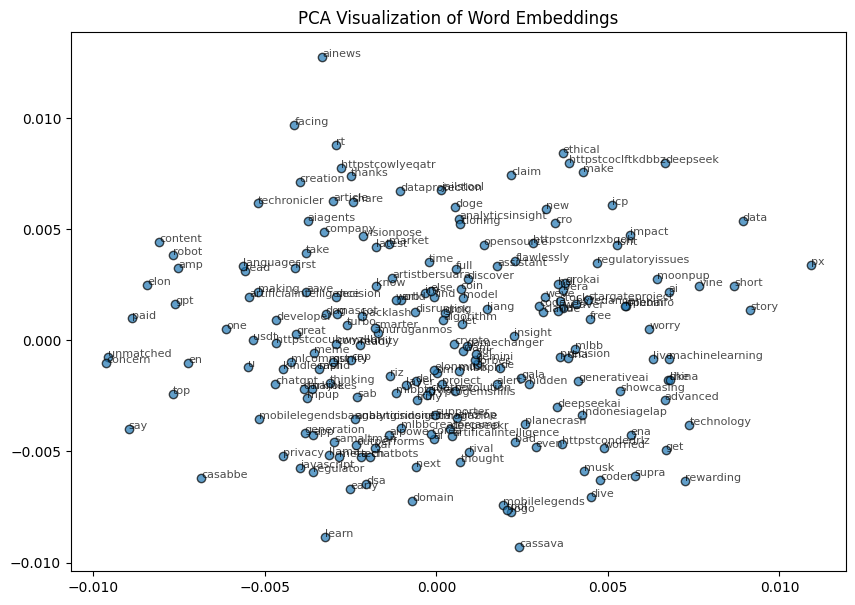

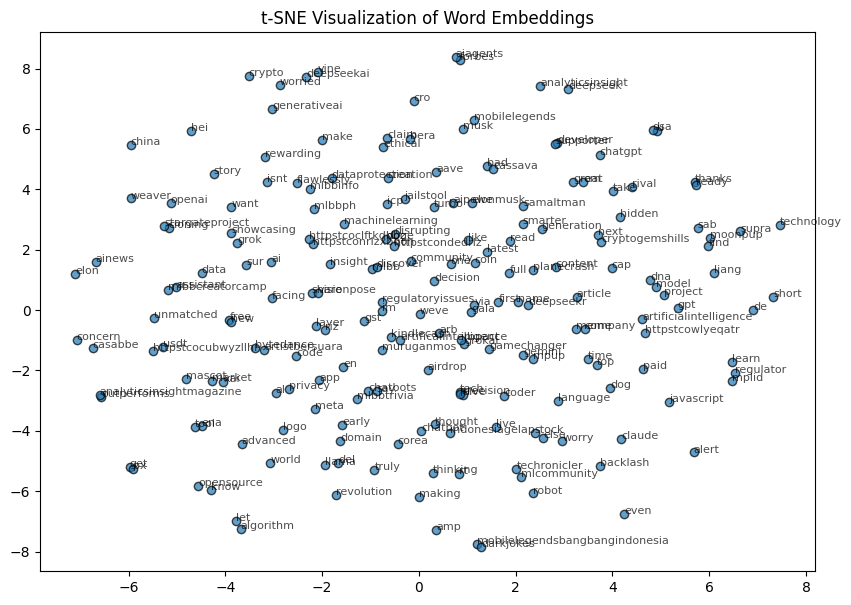

In [27]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

file_path = "/content/sample_data/cleaned_tweets_data.csv"
df = pd.read_csv(file_path)

documents = df["processed_tweets"].tolist()
tokenized_documents = [doc.split() for doc in documents]
embedding_dim = 300
model = Word2Vec(sentences=tokenized_documents, vector_size=embedding_dim, window=5, min_count=1, workers=4)
model.save("vec_model.bin")
words = list(model.wv.index_to_key)[:200]
word_vectors = np.array([model.wv[word] for word in words])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.7)
plt.title("PCA Visualization of Word Embeddings")
plt.show()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(word_vectors)
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], edgecolors='k', alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8, alpha=0.7)
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


In [21]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

file_path = "/content/sample_data/cleaned_tweets_data.csv"
df = pd.read_csv(file_path)

documents = df["processed_tweets"].tolist()

tokenized_documents = [doc.split() for doc in documents]
embedding_dim = 300
model = Word2Vec(sentences=tokenized_documents, vector_size=embedding_dim, window=5, min_count=1, workers=4)

def cosine_similarity(word1, word2, model):
    if word1 in model.wv and word2 in model.wv:
        return model.wv.similarity(word1, word2)
    return None

word_pairs = [("deepseek", "ai"), ("visionpose", "technology"), ("opensource", "ai"), ("performance", "acting"), ("vision", "pose")]
for word1, word2 in word_pairs:
    similarity = cosine_similarity(word1, word2, model)
    if similarity is not None:
        print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    else:
        print(f"One or both words '{word1}', '{word2}' not in vocabulary.")


Cosine Similarity between 'deepseek' and 'ai': 0.0885
Cosine Similarity between 'visionpose' and 'technology': -0.0843
Cosine Similarity between 'opensource' and 'ai': -0.0624
One or both words 'performance', 'acting' not in vocabulary.
One or both words 'vision', 'pose' not in vocabulary.


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



Github Link:
https://github.com/kaveti27022001/Chinmai_kaveti_INFO_5731_SPRING_2025/blob/main/labeled_tweets_data.csv



label Schema:
The sentiment analysis dataset is assigned three such categories — neutral, negative, and positive. Negative tweets were those with unhealthy sentiment of criticism, grievances or negativity. Positive tweets on the other hand were those with positive sentiment i.e., excitement, appreciation or optimism.  Those tweets that contained objective facts or did not have any emotional feelings were regarded as neutral tweets.  The sentiment was assigned using TextBlob which calculates the polarity score of each tweet.  Polarity values from positive tweets were greater than zero, polarity values from negative tweets were lesser than zero,and the polarity values from neutral tweet are exactly equal to zero.  This technique guarantees a methodical and scalable approach to the sentiment annotation.

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

# type your answer


Interesting Assignment at the same time faced difficulty in understanding and writing code from scratch..